<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.-Stats/blob/main/Mahfuzur_Rahman_03_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
%matplotlib inline

In [139]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [140]:
sns.set(color_codes = True)# plotting style
sns.set(rc = {'figure.figsize':(5,5)})# size

In [141]:
# import uniform distributions
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')

In [142]:
n = 10000
start = 10
width = 20
data_uniform  = uniform.rvs(size = n, loc = start, scale = width)

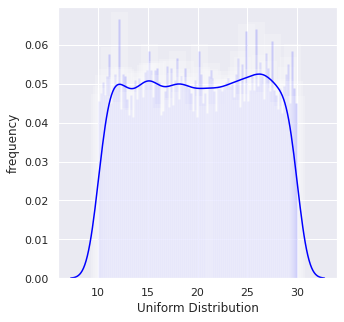

In [143]:
ax = sns.distplot(data_uniform,
                  bins = 100, 
                  kde = True, 
                  color = 'blue',
                  hist_kws = {'linewidth':15, 'alpha':.2})
ax.set(xlabel='Uniform Distribution', ylabel="frequency");

In [144]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu = 3, size = 10000)

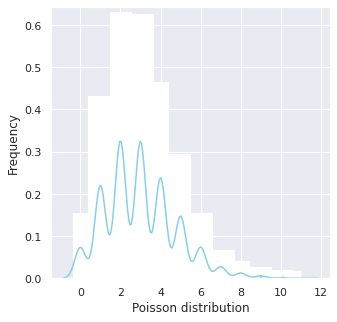

In [145]:
ax = sns.distplot(data_poisson,
                  bins = 30,
                  kde = True, 
                  color = 'skyblue',
                  hist_kws = {'linewidth': 15, 'alpha': 1})
ax.set(xlabel='Poisson distribution', ylabel='Frequency');

In [146]:
# example 2
'''
The number of work-related injuries per month in a manufacturing plant is known 
to follow a Poisson distribution, with a mean of 2.5 work-related injuries a 
month. What is the probability that in a given month, a) No work related 
injuries occur? b) At least one work-related injury occurs?

Here, λ = 2.5 injuries
'''
import numpy as np
from scipy import stats
rate = 2.5
n = np.arange(0,20)
poisson = stats.poisson.pmf(n, rate)
print(poisson)

[8.20849986e-02 2.05212497e-01 2.56515621e-01 2.13763017e-01
 1.33601886e-01 6.68009429e-02 2.78337262e-02 9.94061650e-03
 3.10644266e-03 8.62900738e-04 2.15725184e-04 4.90284510e-05
 1.02142606e-05 1.96428089e-06 3.50764445e-07 5.84607408e-08
 9.13449075e-09 1.34330746e-09 1.86570481e-10 2.45487475e-11]


In [147]:
print('a. probability that no work related injuriesoccur is %1.4f'%poisson[0])

a. probability that no work related injuriesoccur is 0.0821


In [148]:
# p  = probability that at least one work related injuries injury
P = 1-poisson[0]
print('b. possibility of one work related injury is %1.4f'%P)

b. possibility of one work related injury is 0.9179


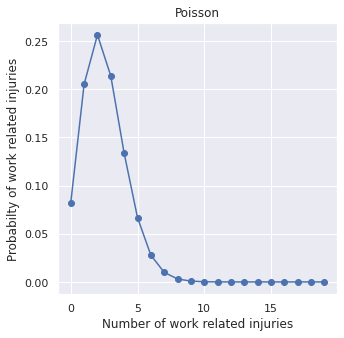

In [149]:
plt.plot(n, poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of work related injuries')
plt.ylabel('Probabilty of work related injuries')
plt.show;

In [150]:
'''
Example 3
A Life Insurance agent sells on the average 3 life insurance policies per week. 
Use the Poisson law to calculate the probability that in a given week, he will 
sell a. Some policies b. 2 or more but less than 5 policies?
'''
rate = 3
n = np.arange(0,16)
cumpoisson = stats.poisson.cdf(n,rate)

In [151]:
# P = probability that the agent sells some policies
P = 1-cumpoisson[0]
print('a. probabilty that he will sell some policies is %1.4f'%P)

a. probabilty that he will sell some policies is 0.9502


In [152]:
# Let P1 be the probability that the agent sells more than 4 policies
P1 = cumpoisson[4]
P2 = cumpoisson[1]
P = P1 - P2
print('b. probabilty that he will sell 2 or more but less than five is: %1.4f'%P)

b. probabilty that he will sell 2 or more but less than five is: 0.6161


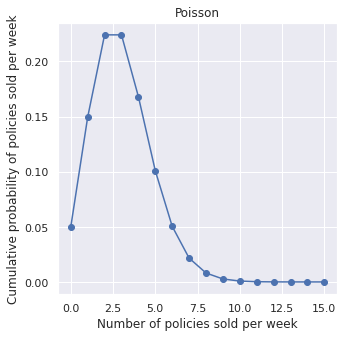

In [153]:
poisson = stats.poisson.pmf(n, rate)
plt.plot(n, poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of policies sold per week')
plt.ylabel('Cumulative probability of policies sold per week')
plt.show();


# Binomial Distributon

In [154]:
from scipy.stats import binom
data_binom = binom.rvs(n = 20, p = 0.8, size = 10000)

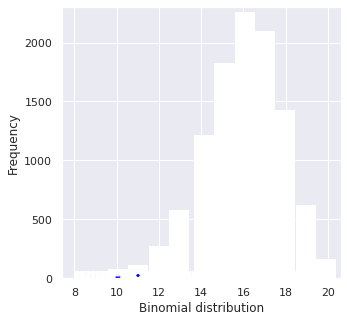

In [155]:
ax = sns.distplot(data_binom, 
                  kde = False, 
                  color  = "blue",
                  hist_kws = {'linewidth': 15, 'alpha': 1})
ax.set(xlabel = "Binomial distribution", ylabel='Frequency');


In [156]:
# binomial distribution example
'''
A LED bulb manufacturing company regularly conducts quality checks at specified 
periods on the products it manufactures. Historically, the failure rate for LED 
light bulbs that the company manufactures is 5%. Suppose a random sample of 10 
LED light bulbs is selected. What is the probability that

a) None of the LED bulbs are defective? b) Exactly one of the LED bulbs is 
defective? c) Two or fewer of the LED bulbs are defective? d) Three or more 
of the LED bulbs are defective
'''
import pandas as pd
import scipy.stats as stats

In [157]:
p = 0.05 # failure rate for LED light bulbs that the company manufactures is 5%
n = 10 # sample size
k = np.arange(0,11) # an array of quantiles

binomial = stats.binom.pmf(k,n,p)
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [158]:
print('a. none defective is : %1.4f'%binomial[0])

a. none defective is : 0.5987


In [159]:
print('b. one defective is : %1.4f' %binomial[1])

b. one defective is : 0.3151


In [160]:
cumbinomial = stats.binom.cdf(k,n,p)
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [161]:
print('c. two or fewer of the LEds are defective is: %1.4f'%cumbinomial[2])

c. two or fewer of the LEds are defective is: 0.9885


In [162]:
print('d. three or more defective is %1.4f '%(1-cumbinomial[2]))

d. three or more defective is 0.0115 


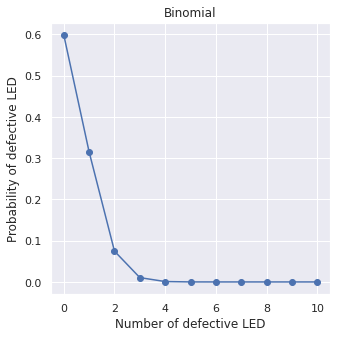

In [163]:
# plot binomial distribution
plt.plot(k, binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of defective LED')
plt.ylabel('Probability of defective LED')
plt.show();

In [164]:
'''
Example 2 The percentage of orders filled correctly at Wendy's was 
approximately 86.8%. Suppose that you go to drive-through window at Wendy's and 
place an order. Two friends of yours independently place orders at the 
drive-through window at the same Wendy's.

What are the probabilities that

a) all three b) none of the three c) atleast two of the three orders will be 
filled correctly? d) what is the mean and standard deviation of the orders 
filled correctly?
'''
p = .868
n = 3
k = np.arange(0,4)
binomial = stats.binom.pmf(k, n, p)
print(binomial)

[0.00229997 0.0453721  0.2983559  0.65397203]


In [165]:
print('a. all three are correct is %1.4f'%binomial[3])

a. all three are correct is 0.6540


In [166]:
print('b. none filled correctly is %1.4f'%binomial[0])

b. none filled correctly is 0.0023


In [167]:
cumbinomial = stats.binom.cdf(k,n,p)
print(cumbinomial)

[0.00229997 0.04767206 0.34602797 1.        ]


In [168]:
P = 1-cumbinomial[1]
print('c. atleast two will be correct is %1.4f'%P)

c. atleast two will be correct is 0.9523


In [169]:
print(f'mean is {n*p}')
print(f'the statndard deviation is {np.sqrt(n*p*(1-p))}')

mean is 2.604
the statndard deviation is 0.5862832080146932


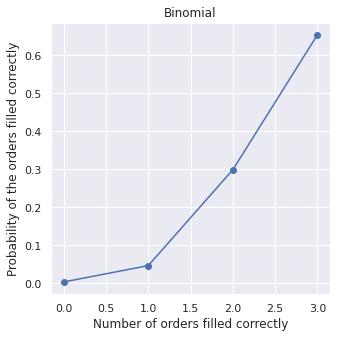

In [170]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of orders filled correctly')
plt.ylabel('Probability of the orders filled correctly')
plt.show()

In [171]:
from scipy.stats import bernoulli
import seaborn as sns

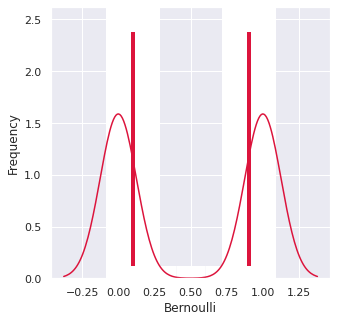

In [172]:
data_bern = bernoulli.rvs(size = 1000, p = 0.5)
ax = sns.distplot(data_bern,
                  color = 'crimson',
                  hist_kws = {'linewidth': 25, 'alpha':1}
                  )
ax.set(xlabel='Bernoulli', ylabel='Frequency');


In [173]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size = 10000, loc = 0, scale = 1)

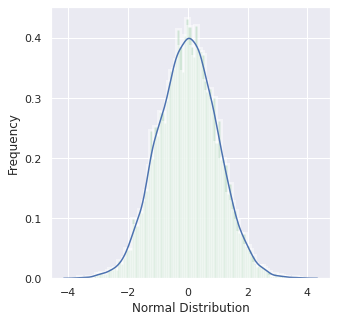

In [174]:
ax = sns.distplot(data_normal,
                  bins=100,
                  color='b',
                  hist_kws={"linewidth": 5,'alpha':0.5, "color": 'g'})
ax.set(xlabel='Normal Distribution', ylabel='Frequency');

In [175]:
'''
A survey on use of smart phones in India was conducted and it is observed the 
smart phone users spend 68 minutes in a day on average in sending messages and 
the corresponding standard deviation is 12 minutes.

Assume that the time spent in sending messages follows a normal distribution. 
a) What proportion of the smart phone users are spending more than 90 minutes 
in sending messages daily? b) What proportion of customers are spending less 
than 20 minutes? c) What proportion of customers are spending between 50 
minutes and 100 minutes?
'''
mu = 68
sigma = 12
# a. what proportion more than 90 mins
z = (90-mu)/sigma
P = 1-stats.norm.cdf(z)
print('a. Proportion of the smart phone users are spending more than 90 mins %1.4f'%P)

a. Proportion of the smart phone users are spending more than 90 mins 0.0334


In [176]:
# prop less than 20 mins
z = (20-mu)/sigma
P = stats.norm.cdf(z)
print('b.%1.7f are spending less than 20 mins'%P)

b.0.0000317 are spending less than 20 mins


In [177]:
z = (50-mu)/sigma
y = (100-mu)/sigma
P1 = stats.norm.cdf(y)
P2 = stats.norm.cdf(z)
print('c. %1.2f percent of people are spending between 50 to 100 minutes'%((P1-P2)*100))

c. 92.94 percent of people are spending between 50 to 100 minutes


In [178]:
'''
The mean salaries of Data Scientists working in Chennai, India is calculated to 
be 7,00,000 INR with a standard deviation of 90,000 INR. The random variable 
salary of Data Scientists follows a normal distribution.

a) What is the probability that a Data Scientist in Chennai has a salary more 
than 10,00,000 INR? b) What is the probability that a Data Scientist in Chennai 
has a salary between 6,00,000 & 9,00,000 INR? c) What is the probability that a
Data Scientist in Chennai has a salary less than 4,00,000 INR?
'''
mu = 700000
sigma = 90000
# more than 1000000
z = (1000000 - mu)/sigma
P = 1 - stats.norm.cdf(z)
print('a. the probability that the salary will be more than 1000000 is %1.4f'%P)



a. the probability that the salary will be more than 1000000 is 0.0004


In [179]:
# b) salary between 6,00,000 & 9,00,000 INR?
z = (600000-mu)/sigma
y = (900000-mu)/sigma
P1 = stats.norm.cdf(z)
P2 = stats.norm.cdf(y)
print('b. probability of salary between 60000 and 90000 is %1.4f'%(P2 - P1))

b. probability of salary between 60000 and 90000 is 0.8536


In [180]:
# c. salary less than 400000
z = (400000 - mu)/sigma
P = stats.norm.cdf(z)
print('c. probability of salary less that 400000 is %1.4f'%P)

c. probability of salary less that 400000 is 0.0004


In [181]:
'''
The fill amount in 2-liter soft drink bottles is normally distributed, with a 
mean of 2.0 liters and a standard deviation of 0.05 liter. If the bottles 
contain less than 95% of the listed net content (1.90 liters, in our case), 
the manufacturer may be subject to penalty by the state office of consumer 
affairs. Bottles that have a net content above 2.1 liters may cause excess 
spillage upon opening. What is the proportion of bottles that will contain

a) between 1.9 and 2.0 liters b) between 1.9 and 2.1 liters c) below 1.9 liters 
or above 2.1 liters d) At least how much soft drink is contained in 99% of the 
bottles?
'''
mu = 2.0
sigma = .05
# between 1.9 and 2.0 liters
z = (1.9-mu)/sigma
y = (2.0-mu)/sigma
P1 = stats.norm.cdf(z)
P2 = stats.norm.cdf(y)
print('a. prop between 1.9 and 2.0 liters is %1.4f'%(P2-P1))

a. prop between 1.9 and 2.0 liters is 0.4772


In [182]:
# between 1.9 and 2.1 liters
z = (1.9-mu)/sigma
y = (2.1-mu)/sigma
P1 = stats.norm.cdf(z)
P2 = stats.norm.cdf(y)
print('b. prop between 1.9 and 2.1 liters is %1.4f'%(P2-P1))

b. prop between 1.9 and 2.1 liters is 0.9545


In [183]:
# below 1.9 liters or above 2.1 liters
z = (1.9-mu)/sigma
y = (2.1-mu)/sigma
P1 = stats.norm.cdf(z)
P2 = 1 - stats.norm.cdf(y)
print('c. prop below 1.9 is %1.4f'%P1)
print('c. prop above 2.1 is %1.4f'%P2)
print('both combined is %1.4f'%(P2+P1))

c. prop below 1.9 is 0.0228
c. prop above 2.1 is 0.0228
both combined is 0.0455


In [184]:
#99% of the bottles
P = stats.norm.isf(q = .99, loc = mu, scale = sigma)
print('d. 99 percent of the bottles contain %1.4f'%P, 'Liters')

d. 99 percent of the bottles contain 1.8837 Liters
